#Loading Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from keras.metrics import Precision, Recall
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Mounting Drive**

#Loading Train and Test data**

In [ ]:
data = pd.read_csv('train_all_tasks.csv')

#Visulalizing data

In [ ]:
from matplotlib import pyplot as plt
data.groupby('label_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#Modified Dataset

In [ ]:

data =data[data['label_category'] != 'none']
text = data['text']
data.head()


In [ ]:
#Feeding dummy boleean data

labels = data['label_category']
labels = pd.get_dummies(data['label_category'], dtype=int)
print(labels)

# Loading GloVe embeddings

In [ ]:

def load_glove_embeddings(path):
    embeddings_index = {}
    with open(path) as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_path = '/content/drive/MyDrive/glove.6B.100d.txt'
glove_embeddings = load_glove_embeddings(glove_path)

#Tokenization

In [ ]:
tokenizer = Tokenizer(num_words = 40000)
tokenizer.fit_on_texts(text)
seq = tokenizer.texts_to_sequences(text)
word_index = tokenizer.word_index
padded_data = pad_sequences(seq, maxlen=256)

In [ ]:
emd_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        emd_matrix[i] = embedding_vector

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()


#Bi-Directional LSTM Model

In [ ]:
# model = Sequential()
# model.add(Embedding(len(word_index) + 1, 100, weights=[emd_matrix], input_length=256, trainable=True))
# model.add(Bidirectional(LSTM(128)))
# model.add(Dense(52, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(4, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
# model.summary()




# Bidirectional LSTM Model Test Accuracy: 0.550000011920929
# Bidirectional LSTM Model Test Precision: 0.5472561120986938
# Bidirectional LSTM Model Test Recall: 0.5279411673545837


In [ ]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# from tensorflow.keras.optimizers import Adam

# # Define the model
# model = Sequential()
# model.add(Embedding(len(word_index) + 1, 100, weights=[emd_matrix], input_length=256, trainable=True))
# model.add(Bidirectional(LSTM(512, return_sequences=True)))
# model.add(Bidirectional(LSTM(256)))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='softmax'))


# optimizer = Adam(learning_rate=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', Precision(), Recall()])


# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), callbacks=[reduce_lr, early_stop])




# print('='*50)
# print(f'Training Loss: {train_loss}')
# print(f'Training Accuracy: {train_accuracy}')
# print(f'Training Precison: {train_precision}')
# print(f'Training Recall: {train_recall}')
# print('='*50)
# ###############
# test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)

# print('='*50)
# print(f'Bidirectional LSTM Model Test Accuracy: {test_loss}')
# print(f'Bidirectional LSTM Model Test Accuracy: {test_accuracy}')
# print(f'Bidirectional LSTM Model Test Precision: {test_precision}')
# print(f'Bidirectional LSTM Model Test Recall: {test_recall}')
# print('='*50)

# plot_history(history)

Epoch 1/50
43/43 [==============================] - 1003s 23s/step - loss: 1.2067 - accuracy: 0.4238 - precision_1: 0.4536 - recall_1: 0.1762 - val_loss: 1.1097 - val_accuracy: 0.4824 - val_precision_1: 0.5575 - val_recall_1: 0.1426 - lr: 0.0010
Epoch 2/50
43/43 [==============================] - 972s 23s/step - loss: 1.1270 - accuracy: 0.4536 - precision_1: 0.5031 - recall_1: 0.1795 - val_loss: 1.0384 - val_accuracy: 0.5015 - val_precision_1: 0.5711 - val_recall_1: 0.3721 - lr: 0.0010
Epoch 3/50
43/43 [==============================] - 964s 22s/step - loss: 1.0293 - accuracy: 0.5022 - precision_1: 0.5491 - recall_1: 0.2940 - val_loss: 0.9880 - val_accuracy: 0.5485 - val_precision_1: 0.6146 - val_recall_1: 0.3353 - lr: 0.0010
Epoch 4/50
43/43 [==============================] - 969s 23s/step - loss: 0.9142 - accuracy: 0.5644 - precision_1: 0.6174 - recall_1: 0.4400 - val_loss: 1.0164 - val_accuracy: 0.5206 - val_precision_1: 0.6091 - val_recall_1: 0.2750 - lr: 0.0010
Epoch 5/50
43/43 [=

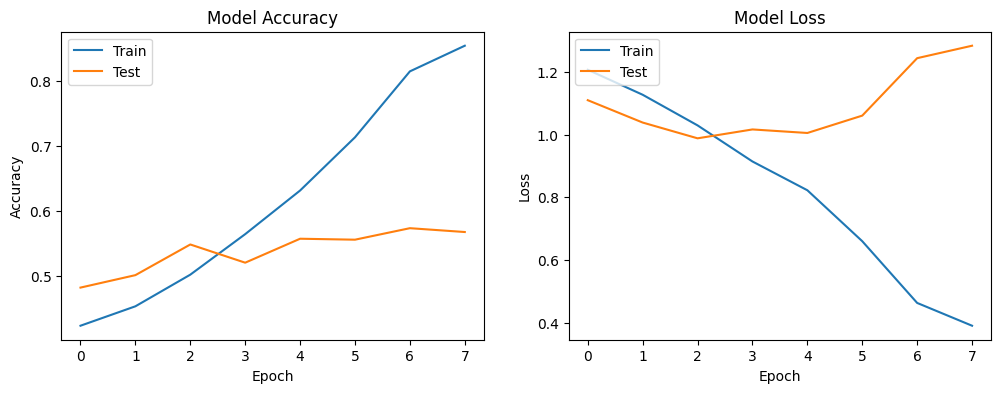

In [20]:
# Model Architecture
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, weights=[emd_matrix], input_length=256, trainable=True))
model.add(Bidirectional(LSTM(512, return_sequences=True)))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Optimizer and Compile
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', Precision(), Recall()])

# Training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[reduce_lr, early_stop])
train_loss, train_accuracy,train_precision,train_recall = model.evaluate(X_train, y_train)

print('='*50)
print(f'Training Loss: {train_loss}')
print(f'Training Accuracy: {train_accuracy}')
print(f'Training Precison: {train_precision}')
print(f'Training Recall: {train_recall}')
print('='*50)
# Evaluation
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)
print('='*50)
print(f'Bidirectional LSTM Model Test Accuracy: {test_accuracy}')
print(f'Bidirectional LSTM Model Test Precision: {test_precision}')
print(f'Bidirectional LSTM Model Test Recall: {test_recall}')
print('='*50)

plot_history(history)


# history= model.fit(X_train, y_train, epochs=10, batch_size=50, validation_data=(X_test, y_test))
# train_loss, train_accuracy,train_precision,train_recall = model.evaluate(X_train, y_train)

# print('='*50)
# print(f'Training Loss: {train_loss}')
# print(f'Training Accuracy: {train_accuracy}')
# print(f'Training Precison: {train_precision}')
# print(f'Training Recall: {train_recall}')
# print('='*50)



# # Evaluate Bidirectional LSTM model
# test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)

# print('='*50)
# print(f'Bidirectional LSTM Model Test Accuracy: {test_loss}')
# print(f'Bidirectional LSTM Model Test Accuracy: {test_accuracy}')
# print(f'Bidirectional LSTM Model Test Precision: {test_precision}')
# print(f'Bidirectional LSTM Model Test Recall: {test_recall}')
# print('='*50)

# plot_history(history)
